## Unsupervised learning

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl 
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=100, centers=4, random_state=500, cluster_std=1.25)

In [3]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [4]:
y_ = model.predict(x)
y_

array([0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 1, 3, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3,
       2, 2, 2, 1, 0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3])

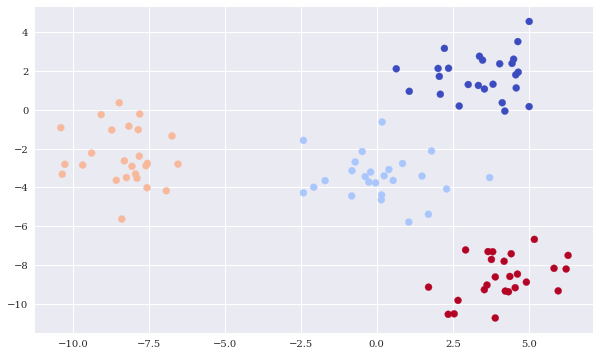

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y_, cmap='coolwarm');

## Reinforcement Learning

In [6]:
# reinforcement learning
ssp = [1,1,1,1,0]
asp = [1,0]

def epoch():
    tr=0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr+=1
    return tr

In [7]:
rl = np.array([epoch() for _ in range(15)])
rl

array([56, 57, 52, 52, 50, 51, 42, 51, 50, 55, 48, 44, 54, 41, 52])

In [8]:
rl.mean()

50.333333333333336

In [9]:
ssp = [1,1,1,1,0]

def epoch():
    tr=0
    asp = [0,1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr+=1
        asp.append(s)
    return tr

In [10]:
rl = np.array([epoch() for _ in range(15)])
rl

array([63, 67, 73, 69, 63, 58, 66, 72, 60, 65, 73, 70, 66, 67, 68])

In [11]:
rl.mean()

66.66666666666667

In [12]:
def f(x):
    return 2 * x ** 2 -x ** 3 / 3 

In [13]:
x = np.linspace(-2,4,25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [14]:
y = f(x)
y

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

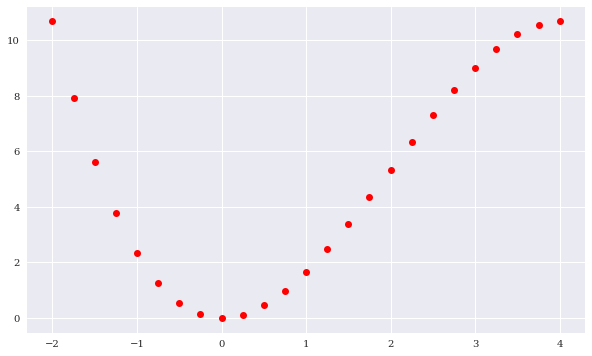

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro')

In [16]:
beta = np.cov(x,y,ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [17]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [18]:
y_ = alpha + beta * x
MSE = ((y - y_)**2).mean()
MSE

10.721953125

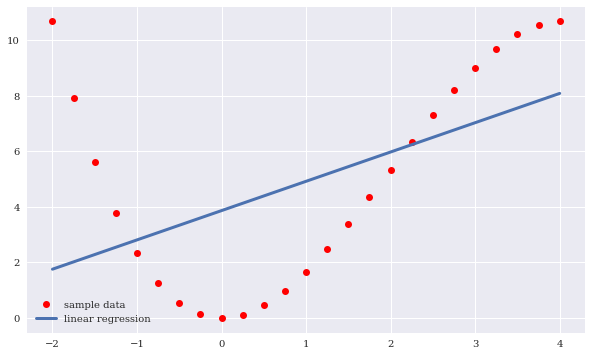

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x,y, 'ro', label='sample data')
plt.plot(x,y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


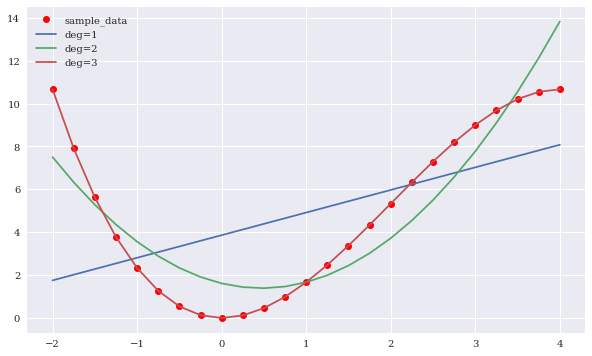

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro', label='sample_data')
for deg in [1,2,3]:
    reg = np.polyfit(x,y, deg=deg)
    y_ = np.polyval(reg,x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x,np.polyval(reg,x), label=f'deg={deg}')
plt.legend();


In [21]:
reg

array([-0.3333,  2.    ,  0.    , -0.    ])

In [22]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)
model.fit(x.reshape(-1,1), y)
MLPRegressor(hidden_layer_sizes=[256,256,256], learning_rate_init=0.03, max_iter=5000)
y_ = model.predict(x.reshape(-1,1))
MSE = ((y - y_) ** 2).mean()
MSE

0.009791381453965926

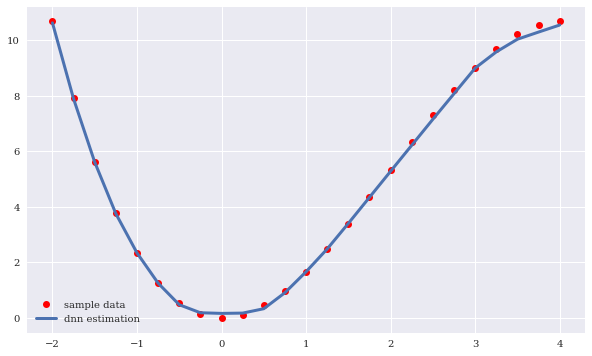

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label='sample data')
plt.plot(x,y_, lw=3.0, label='dnn estimation')
plt.legend();

In [24]:
import tensorflow as tf 
tf.random.set_seed(100)

In [25]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [26]:
((y - y_)**2).mean()

0.009791381453965926

round=1 | MSE=3.87256
round=2 | MSE=0.92527
round=3 | MSE=0.28527
round=4 | MSE=0.13191
round=5 | MSE=0.09568


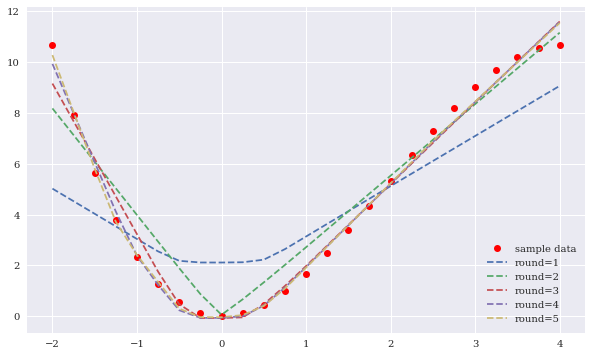

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro', label='sample data')
for _ in range(1,6):
    model.fit(x,y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten())**2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x,y_,'--', label=f'round={_}')
plt.legend();

In [28]:
np.random.seed(0)
x = np.linspace(-1,1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


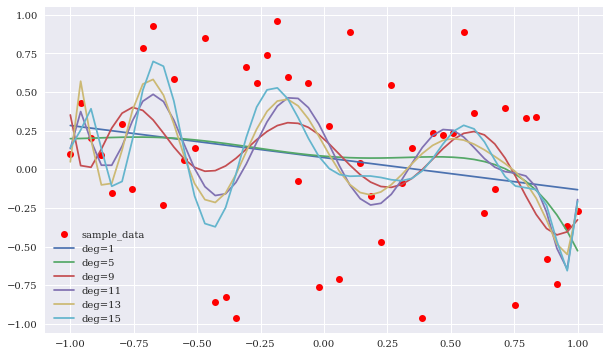

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro', label='sample_data')
for deg in [1,5,9,11,13,15]:
    reg = np.polyfit(x,y,deg=deg)
    y_ = np.polyval(reg,x)
    MSE =  ((y - y_)**2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg,x), label=f'deg={deg}')
plt.legend();

In [30]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


round1 | MSE=0.13808
round2 | MSE=0.07558
round3 | MSE=0.10506
round4 | MSE=0.04289
round5 | MSE=0.07401
round6 | MSE=0.02633
round7 | MSE=0.02584
Wall time: 20.1 s


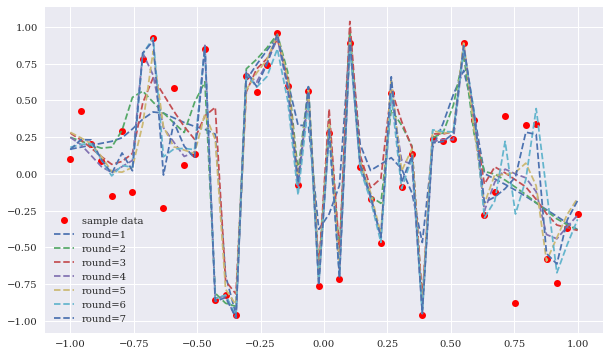

In [32]:
%%time
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label='sample data')
for _ in range(1,8):
    model.fit(x,y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten())**2).mean()
    print(f'round{_} | MSE={MSE:.5f}')
    plt.plot(x,y_, '--', label=f'round={_}')
plt.legend();

In [33]:
f=5
n=10
np.random.seed(100)
x = np.random.randint(0,2,(n,f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [34]:
y = np.random.randint(0,2,n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [35]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(x,y, epochs=50, verbose=False)

In [36]:
y_ = np.where(model.predict(x).flatten()>0.5, 1,0)
y_

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [37]:
y == y_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

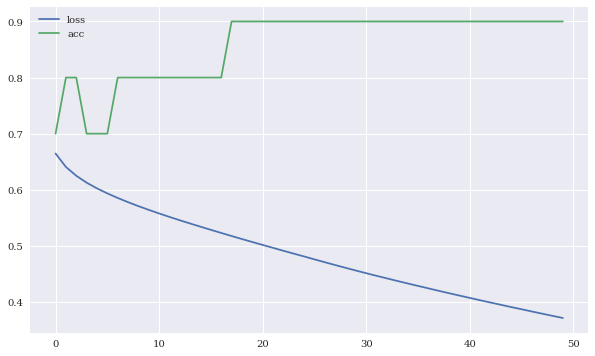

In [38]:
res = pd.DataFrame(history.history)
res.plot(figsize=(10,6));

In [39]:
f = 10 
n = 250
np.random.seed(100)
x = np.random.randint(0,2,(n,f))
x[:4]

array([[0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]])

In [40]:
y = np.random.randint(0,2,n)
y[:4]

array([0, 1, 0, 0])

In [41]:
2 ** f

1024

In [42]:
fcols = [f'f{_}' for  _ in range(f)]
fcols

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']

In [43]:
data = pd.DataFrame(x, columns=fcols)
data['l'] = y
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f0      250 non-null    int32
 1   f1      250 non-null    int32
 2   f2      250 non-null    int32
 3   f3      250 non-null    int32
 4   f4      250 non-null    int32
 5   f5      250 non-null    int32
 6   f6      250 non-null    int32
 7   f7      250 non-null    int32
 8   f8      250 non-null    int32
 9   f9      250 non-null    int32
 10  l       250 non-null    int32
dtypes: int32(11)
memory usage: 10.9 KB


In [44]:
grouped = data.groupby(list(data.columns))
freq = grouped['l'].size().unstack(fill_value=0)
freq['sum'] = freq[0] + freq[1]
freq.head(10)

l                              0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9           
0  0  0  0  0  0  0  1  1  1   0  1    1
                  1  0  1  0   1  1    2
                           1   0  1    1
               1  0  0  0  0   1  0    1
                           1   0  1    1
                     1  1  1   0  1    1
                  1  0  0  0   0  1    1
                        1  0   0  1    1
            1  0  0  0  1  1   1  0    1
                  1  1  0  0   1  0    1

In [45]:
freq['sum'].describe().astype(int)

count    227
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        2
Name: sum, dtype: int32

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier(hidden_layer_sizes=[128,128,128], max_iter=1000, random_state=100)
model.fit(data[fcols], data['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [47]:
accuracy_score(data['l'], model.predict(data[fcols]))

0.952

In [48]:
split = int(len(data)*0.7)
train = data[:split]
test = data[split:]
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [49]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9714285714285714

In [50]:
factor = 50
big = pd.DataFrame(np.random.randint(0,2,(factor * n, f)), columns=fcols)
big['l'] = np.random.randint(0,2, factor * n)
train = big[:split]
test = big[split:]
model.fit(train[fcols], train['l'])

MLPClassifier(hidden_layer_sizes=[128, 128, 128], max_iter=1000,
              random_state=100)

In [51]:
accuracy_score(train['l'], model.predict(train[fcols]))

0.9657142857142857

In [52]:
accuracy_score(test['l'], model.predict(test[fcols]))

0.5043407707910751

In [53]:
grouped = big.groupby(list(data.columns))
freq = grouped['l'].size().unstack(fill_value=0)
freq['sum'] = freq[0] + freq[1]
freq.head(6)

l                               0  1  sum
f0 f1 f2 f3 f4 f5 f6 f7 f8 f9            
0  0  0  0  0  0  0  0  0  0   10  9   19
                           1    5  4    9
                        1  0    2  5    7
                           1    6  6   12
                     1  0  0    9  8   17
                           1    7  4   11

In [54]:
freq['sum'].describe().astype(int)

count    1024
mean       12
std         3
min         2
25%        10
50%        12
75%        15
max        26
Name: sum, dtype: int32

In [55]:
8**25

37778931862957161709568